In [1]:
import pandas as pd 
import numpy as np 
import random
import io

### leemos la base de datos a trabajar en nuestra ruta de origen

In [2]:
encondata = pd.read_csv('econdata.csv')
print(encondata.head())

   id                  geo_point_2d  \
0   0   19.424781053,-99.1327537959   
1   1  19.4346139576,-99.1413808393   
2   2  19.4340695945,-99.1306348409   
3   3      19.42489472,-99.12073393   
4   4      19.42358238,-99.12451093   

                                           geo_shape   clave_cat  \
0  {"type": "Polygon", "coordinates": [[[-99.1332...  307_130_11   
1  {"type": "MultiPoint", "coordinates": [[-99.14...  002_008_01   
2  {"type": "MultiPoint", "coordinates": [[-99.13...  006_002_12   
3  {"type": "MultiPoint", "coordinates": [[-99.12...  323_102_06   
4  {"type": "MultiPoint", "coordinates": [[-99.12...  323_115_12   

            delegacion perimetro     tipo  \
0           Cuauhtémoc         B  Mercado   
1            Cuautémoc         A    Museo   
2            Cuautémoc         A    Museo   
3  Venustiano Carranza         B    Hotel   
4  Venustiano Carranza         B    Hotel   

                                              nom_id  
0                             

In [3]:
encondata.shape

(230, 8)

### funciones de muestreo:

### 1) muestreo aleatorio simple

In [27]:
aleatorio_8 = encondata.sample(n=8)
print(aleatorio_8)

      id                  geo_point_2d  \
73    73  19.4218384283,-99.1267852296   
194  194  19.4288786806,-99.1456731565   
63    63  19.4339116282,-99.1468371035   
72    72  19.4454901265,-99.1471012862   
82    82   19.4220369889,-99.120775543   
229  229  19.4346765421,-99.1318394918   
170  170      19.43162145,-99.13535842   
15    15       19.42413788,-99.1324515   

                                             geo_shape   clave_cat  \
73   {"type": "MultiPoint", "coordinates": [[-99.12...  007_005_07   
194  {"type": "MultiPoint", "coordinates": [[-99.14...  002_060_04   
63   {"type": "MultiPoint", "coordinates": [[-99.14...  002_015_07   
72   {"type": "MultiPoint", "coordinates": [[-99.14...  003_046_14   
82   {"type": "MultiPoint", "coordinates": [[-99.12...  423_013_18   
229  {"type": "MultiPoint", "coordinates": [[-99.13...  005_145_14   
170  {"type": "MultiPoint", "coordinates": [[-99.13...  001_028_11   
15   {"type": "MultiPoint", "coordinates": [[-99.13...  307_1

In [28]:
prop_25= encondata.sample(frac=.25)
prop_25.head()
print(prop_25.shape)

(58, 9)


### 2) muestreo sistematico

In [29]:
def systematic_sampling(encondata,step):
    indexes = np.arange(0,len(encondata),step=step)
    systematic_sample = encondata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(encondata, 3)
print(systematic_sample)

      id                  geo_point_2d  \
0      0   19.424781053,-99.1327537959   
3      3      19.42489472,-99.12073393   
6      6      19.43553422,-99.12324801   
9      9  19.4407152937,-99.1498060057   
12    12      19.43990186,-99.14813347   
..   ...                           ...   
216  216  19.4247697438,-99.1249707246   
219  219  19.4234096295,-99.1438351156   
222  222   19.4397905042,-99.134628735   
225  225      19.43094655,-99.12455418   
228  228  19.4406567734,-99.1394531646   

                                             geo_shape   clave_cat  \
0    {"type": "Polygon", "coordinates": [[[-99.1332...  307_130_11   
3    {"type": "MultiPoint", "coordinates": [[-99.12...  323_102_06   
6    {"type": "MultiPoint", "coordinates": [[-99.12...  318_116_11   
9    {"type": "MultiPoint", "coordinates": [[-99.14...  012_146_22   
12   {"type": "MultiPoint", "coordinates": [[-99.14...  003_079_16   
..                                                 ...         ...   
216  

### 3) Muestreo estratificado:

In [30]:
encondata["estratificado"] = encondata['delegacion'] + "," + encondata['tipo']
(encondata['estratificado'].value_counts()/len(encondata)).sort_values(ascending=False)

estratificado
Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: count, dtype: float64

Nuestros datos dicen que la proporcion es la siguiente:
1) hoteles en cuathemoc 0.5
2) Museos en cuathemoc 0.2
3) Hoteles en venustiana 0.1
4) mercados en cuathemos 0.1
5) mercados en carranza 0.1

In [31]:
def data_estratificada (encondata, nombres_Columnas_estrat, Valores_estrat, proporcion_estrat, random_state = None):
    df_estrat = pd.DataFrame(columns=encondata.columns)
    pos =-1
    for i in range (len (Valores_estrat)):
        pos += 1
        if pos == len(Valores_estrat) -1:
            ratio_len = len(encondata)-len(df_estrat)

        else:
            ratio_len = int(len(encondata)*proporcion_estrat[i])
    

        df_filtered = encondata[encondata[nombres_Columnas_estrat]==Valores_estrat[i]]
        df_tem = df_filtered.sample(replace=True,n=ratio_len, random_state=random_state)

        df_estrat = pd.concat([df_estrat, df_tem])
    return df_estrat


In [32]:
valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo','Venustiano Carranza,Hotel','Cuauhtémoc,Mercado','Venustiano Carranza,Mercado' ]
prop_estrat=[0.5,0.2,0.1,0.1,0.1]
df_estraf = data_estratificada(encondata,'estratificado',valores_estrat, prop_estrat,random_state=42)

In [33]:
df_estraf

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc,Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc,Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc,Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc,Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc,Hotel"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza,Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza,Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza,Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza,Mercado"


## CALCULO DE LA VARIANZA Y DESV STANDARD


In [62]:
import math
#edades = [28,24,25,23,38,52]
edades = [28,24,28,24,28,24]
promedio = np.mean(edades)
print(promedio)
total = 0
for a in edades:
    total += pow(a-31.7,2)

varianza =total /((len(edades)-1))
print(total)
print(varianza)
desv = math.sqrt(varianza)
print(desv)


26.0
218.93999999999997
43.788
6.617250184177714


In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width','class']
iris = pd.read_csv(url, names=names)

### leemos la base de datos 

In [77]:
iris.head

<bound method NDFrame.head of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

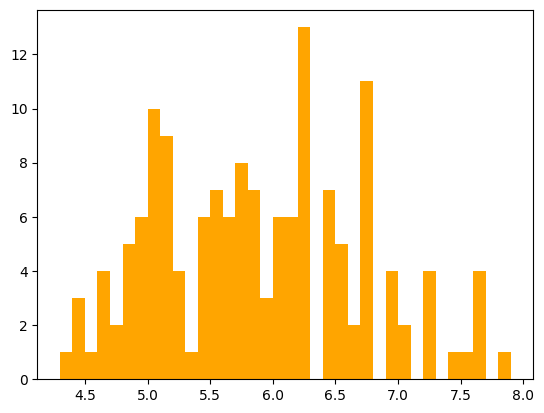

In [78]:
plt.hist(iris['sepal-length'], color='orange', bins=int(180/5))

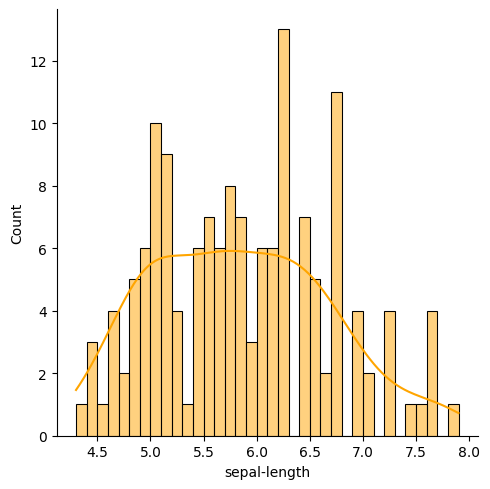

In [82]:
sns.displot(iris['sepal-length'],  kde=True, bins=int(180/5), color ='orange')

### CALCULO de la varianza de todo el dataset
 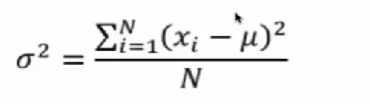

In [83]:
iris['sepal-length'].var()

0.6856935123042507

### Calculo de la desviacion Estandar de todo el dataset
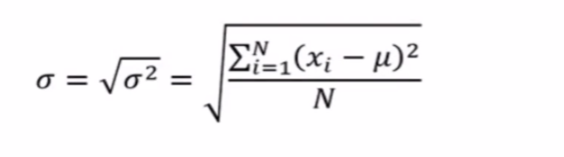


In [84]:
iris['sepal-length'].std()

0.828066127977863

In [85]:
iris['sepal-length'].mean()

5.843333333333334

### Creacion de una muestra mediante un muestreo aleatorio simple

In [86]:
muestra = iris.sample(frac=0.5)
muestra

,sepal-length,sepal-width,petal-length,petal-width,class
89,5.5,2.5,4.0,1.3,Iris-versicolor
143,6.8,3.2,5.9,2.3,Iris-virginica
52,6.9,3.1,4.9,1.5,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
...,...,...,...,...,...
67,5.8,2.7,4.1,1.0,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
114,5.8,2.8,5.1,2.4,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa


### CALCULO  DE LA VARIANZA de la muestra


In [87]:
muestra['sepal-length'].var()

0.6071279279279278

### CALCULO  DE LA DESVIACION STANDARD de la muestra


In [88]:
muestra['sepal-length'].std()

0.7791841425028668

In [89]:
muestra['sepal-length'].mean()

5.750666666666667

(array([1., 1., 2., 2., 3., 3., 5., 4., 4., 0., 2., 5., 5., 3., 4., 2., 5.,
        2., 0., 4., 4., 1., 2., 3., 2., 2., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 1.]),
 array([4.4       , 4.49722222, 4.59444444, 4.69166667, 4.78888889,
        4.88611111, 4.98333333, 5.08055556, 5.17777778, 5.275     ,
        5.37222222, 5.46944444, 5.56666667, 5.66388889, 5.76111111,
        5.85833333, 5.95555556, 6.05277778, 6.15      , 6.24722222,
        6.34444444, 6.44166667, 6.53888889, 6.63611111, 6.73333333,
        6.83055556, 6.92777778, 7.025     , 7.12222222, 7.21944444,
        7.31666667, 7.41388889, 7.51111111, 7.60833333, 7.70555556,
        7.80277778, 7.9       ]),
 <BarContainer object of 36 artists>)

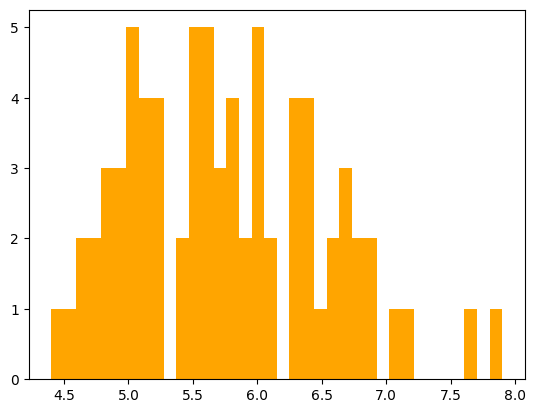

In [90]:
plt.hist(muestra['sepal-length'], color='orange', bins=int(180/5))

## CALCULO INTERVALOS DE CONFIANZA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st 

In [2]:
np.random.seed(20)

var1 = np.random.randint(0,10,10) #Dias de Vacaciones
var2 = var1 + np.random.normal(0,1,10) #dinero gastado


In [3]:
print(var1)
print("--"*5)
print(var2)

[3 9 4 6 7 2 0 6 8 5]
----------
[1.91516741 9.55969629 4.93946935 5.02151896 7.50309684 2.40641447
 0.32346101 5.50658912 7.20798321 4.15763207]


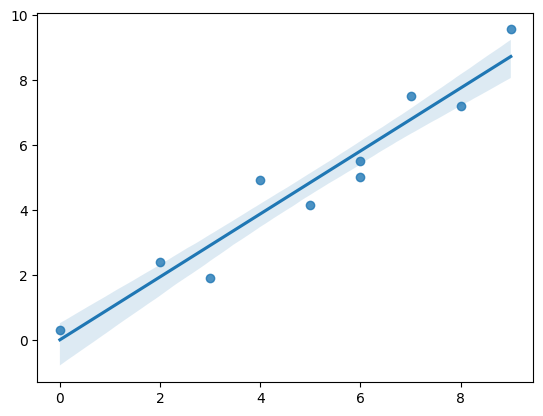

In [4]:
#Visualizacion de resultados con un intervalo de confianza de un 80%

grafico = sns.regplot(x=var1, y=var2, ci=80)



In [5]:
tupla = list(zip(var1, var2))
tupla

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [6]:
tabla = pd.DataFrame(tupla, columns=['Dias vacaciones','Dinero Gastado'])
tabla

,Dias vacaciones,Dinero Gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [7]:
# 95 de intervalo de confianza
st.t.interval(confidence=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla))


(array([2.93201634, 2.92062172]), array([6.92208653, 6.93348116]))

## TIPOS DE PRUEBAS DE HIPOTESIS

In [37]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width','class']
iris = pd.read_csv(url, names=names)

In [14]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### TIPOS DE PRUEBAS
#### Distribucion T de Student
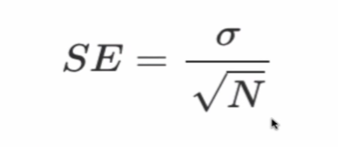

In [16]:
se_length =iris['sepal-length'].std()/np.sqrt(10)
se_width = iris['sepal-width'].std()/np.sqrt(10)

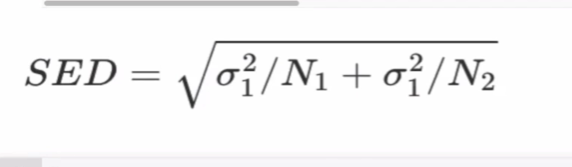

In [17]:
sed = np.sqrt((se_length**2)+(se_width**2))

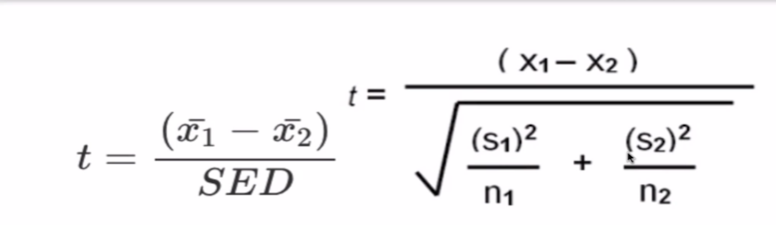

In [36]:
t_stat = (iris['sepal-length'].mean()-iris['sepal-width'].mean())/sed
t_stat

9.436693738890318

In [39]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

TtestResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112, df=298.0)

### b) correlacion y coeficiente de pearson

In [42]:
corr_Normal = iris['sepal-length'].corr(iris['sepal-width'])
corr_Normal

-0.1093692499506493

In [43]:
corr_pearson = st.pearsonr(iris['sepal-length'], iris['sepal-width'])
corr_pearson

PearsonRResult(statistic=-0.10936924995064938, pvalue=0.18276521527136963)

### C) analisis de la varianza (ANOVA)

In [45]:
anova = f_oneway(iris['sepal-length'],iris['sepal-width'])
anova

F_onewayResult(statistic=1335.7678308241748, pvalue=3.98783811484836e-112)

# Boostrapping

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [50]:
data = np.random.normal(loc=34, size=10000)
data

array([33.0931369 , 32.60607959, 33.94170992, ..., 32.42063636,
       33.61238865, 32.41187128])

In [51]:
data.mean()

33.99596502846017

### iniciamos boostrappinig para calcular el promedio de edades

In [56]:
promedio = []
for i in range(40):
    muestra = random.sample(data.tolist(),5)
    print(muestra)
    prom = np.mean(muestra)
    promedio.append(prom)

promedio

[34.65525625483215, 33.75444208449982, 34.587978833192146, 34.7763435369415, 35.08453008857193]
[35.15575612095602, 34.427790319319975, 34.329862458711034, 33.338839061791745, 33.50213797145134]
[32.90011500584299, 33.75789165028844, 33.485148985652124, 35.11972353520614, 33.823104707499766]
[33.84335832345394, 34.82404834338121, 33.1771206013119, 32.6147195347319, 33.30313963405423]
[33.99733563935071, 35.428728510603754, 33.080476682067875, 34.84606718787224, 35.40298767366123]
[33.67004603843043, 34.40865875710882, 36.09319107960279, 32.74141246082331, 33.86452943925245]
[34.752822908421024, 34.810238364811454, 34.35085408370709, 33.55279287965626, 35.22365772284565]
[34.847994262965926, 34.034902867009386, 34.34677111121591, 33.738012533158, 33.218698963875326]
[33.22101305941271, 34.565771566713984, 34.54687039990197, 33.09738360867675, 33.4863073332853]
[33.269406766566256, 34.489183444148885, 33.097779181712596, 33.46014975088721, 34.42843005910231]
[34.33917571980469, 32.093106

[34.57171015960752,
 34.150877186446024,
 33.81719677689789,
 33.55247728738664,
 34.55111913871117,
 34.15556755504356,
 34.538073191888294,
 34.037275947644915,
 33.783469193598144,
 33.74898984048345,
 33.350284408931444,
 34.18830153979686,
 34.13058667820688,
 33.90460313239043,
 33.569315145323685,
 34.38542446622186,
 33.91690719881956,
 34.73824149766078,
 33.68077898194487,
 34.399629593745054,
 33.58766764570635,
 32.954145971048085,
 33.32226573967559,
 34.41783353402947,
 33.56076836619718,
 34.71076264756594,
 34.27099179205359,
 34.245834035348324,
 33.55702555413588,
 33.88183846466497,
 34.48653360864648,
 34.23708222224392,
 33.804475002780904,
 34.269414917233114,
 34.334637822431766,
 34.61190414012312,
 34.19283431952518,
 34.017439389064876,
 33.65034627148295,
 34.496747396216904]

In [55]:
np.mean(promedio)

33.877749792540996

In [57]:
# Lista para almacenar promedios
promedio = []

for i in range(40):
    indices = np.random.choice(len(data), size=5, replace=False)  # Obtener 5 índices aleatorios
    muestra = data[indices]  # Extraer valores usando los índices
    print(f"Índices seleccionados: {indices}")
    print(f"Valores seleccionados: {muestra}")
    
    prom = np.mean(muestra)
    promedio.append(prom)

Índices seleccionados: [ 663 2892 9541 2707 6520]
Valores seleccionados: [34.72614118 35.84035971 34.51632814 34.95479405 33.08418352]
Índices seleccionados: [3959 8276 2433 8795 4477]
Valores seleccionados: [34.9056506  33.18502559 33.97307628 33.90198159 35.07396636]
Índices seleccionados: [7012 7225  552 2782 4034]
Valores seleccionados: [33.15045079 34.30277864 34.94326836 33.94556799 34.44089063]
Índices seleccionados: [8629 2854 8589 8966 6425]
Valores seleccionados: [32.62755688 34.58033283 31.31562418 33.98509269 33.7284964 ]
Índices seleccionados: [ 704 1357 1891 5671 1614]
Valores seleccionados: [34.97437675 34.13334876 33.82554947 34.30711432 32.88316181]
Índices seleccionados: [9304  644 8528 6417 8089]
Valores seleccionados: [36.09587346 33.99674792 33.0308462  34.41223854 33.18580134]
Índices seleccionados: [2359 2605 2841 2685 2348]
Valores seleccionados: [34.95547334 34.56509003 33.14370403 32.8037842  32.22623467]
Índices seleccionados: [ 748 7043 5020 6189 8867]
Valor

### VALIDACION CRUZADA EN PYTHON

In [ ]:
import pandas as pd
import numpy as np

In [62]:
cancerdata  = pd.read_csv('cancerdata.csv')
df = pd.DataFrame(cancerdata)
df.head(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [63]:
X = df.iloc[:,2:]
Y = df.iloc[:,1]

In [64]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [66]:
Y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
resultado = model.score(X_test, Y_test)
print(resultado)


0.8947368421052632


In [78]:
#validacion cruzada K fold
from sklearn.model_selection import KFold

model2 =  DecisionTreeClassifier()
KFold_validation = KFold(10)



In [80]:
from sklearn.model_selection import cross_val_score
resultado2 = cross_val_score(model2,X,Y, cv=KFold_validation)
print(resultado2)
resultado2.mean()

[0.92982456 0.9122807  0.9122807  0.94736842 0.92982456 0.98245614
 0.9122807  0.98245614 0.94736842 0.92857143]


0.9384711779448622